# SIR model run with synthetic data

**Author: Veronica Scerra**  
**Last Updated: 2025-10-11**

**Purpose:**
Simulate the deterministic SIR (Susceptible–Infectious–Recovered) model on **synthetic data** to establish a baseline for model behavior and visualization tools.

**Inputs & Dependencies:**
- Code: `src/epimodels/sir.py`  
- Libraries: `numpy`, `matplotlib`, `pandas`  
- No external data required.

**Outputs:**
- Epidemic curves (S, I, R fractions over time)
- Approximate daily incidence plot
- Optional CSV export: `../data/sir_synthetic_outputs.csv`

**Context:**
First notebook in the **SIR Model Project**, serving as a baseline for testing extensions (e.g., SEIR, stochastic variants, parameter fitting).

### Import paths and dependencies

In [3]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from epimodels.sir import SIRModel

import numpy as np
import matplotlib.pyplot as plt

### Synthetic simulation

In [4]:
# parameter setting
N = 10000
beta = 0.3
gamma = 0.1
I0 = 10
t = np.linspace(0, 160, 161)

model = SIRModel(N, beta, gamma)
outputs = model.simulate(t, I0)
summary = model.summary(outputs)
summary


{'peak_day': 38.0,
 'peak_infected': 3006.226525779381,
 'peak_prevalence': 0.30062265257793813,
 'final_size': 0.9405161358673365}

### Plot Results

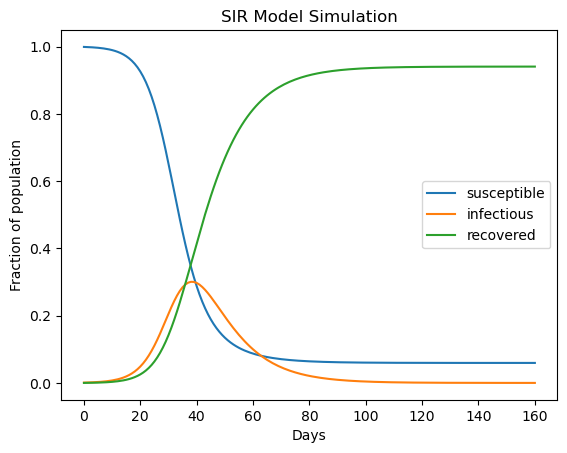

In [6]:
S, I, R = outputs["S"], outputs["I"], outputs["R"]
plt.plot(t, S/N, label='susceptible')
plt.plot(t, I/N, label='infectious')
plt.plot(t, R/N, label='recovered')
plt.xlabel('Days'); plt.ylabel('Fraction of population')
plt.title('SIR Model Simulation')
plt.legend(); plt.show()


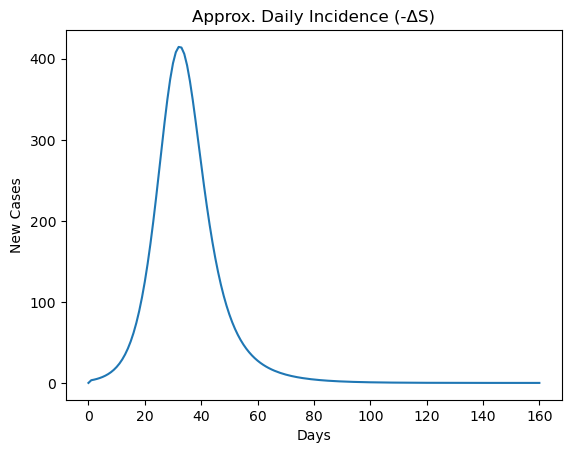

In [8]:
# Plot of daily infected
plt.plot(t, outputs["incidence"])
plt.title("Approx. Daily Incidence (-ΔS)")
plt.xlabel("Days")
plt.ylabel("New Cases")
plt.show()

### Parameter Sensitivity

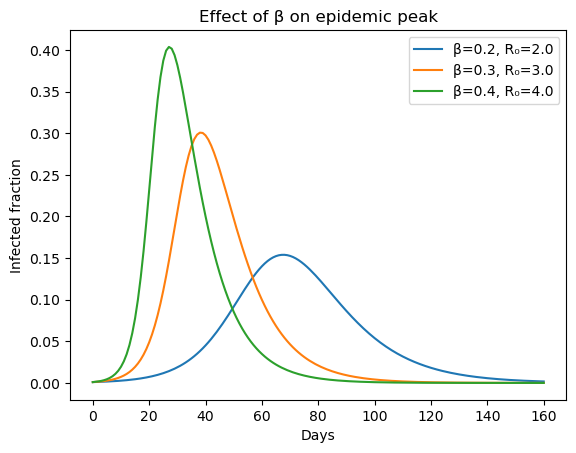

In [9]:
for b in [0.2, 0.3, 0.4]:
    m = SIRModel(N, b, gamma)
    out = m.simulate(t, I0)
    plt.plot(t, out["I"]/N, label=f"β={b}, R₀={b/gamma:.1f}")
plt.xlabel("Days"); plt.ylabel("Infected fraction")
plt.title("Effect of β on epidemic peak")
plt.legend(); plt.show()